In [ ]:
#1. Download the data file above and read it into a pandas DataFrame.
#2. Add the code necessary to describe the dataset
#3. Using markdown commentary describe the dataset 
#4. Conduct at least three EDA techniques on the dataset, include markdown commentary to describe what you are doing, why you are doing it and the results of each analysis
#5. Using Taxes as the independent variable and Sell as the dependent variable, fit a linear regression model and display the output from the model
#6. In addition to the model output include markdown commentary about the important statistics from the output; is taxes a good predictor for selling price? Why or why not?
#7. Repeat this procedure using one of the other variables as the independent variable. Which model is "better"? What are some limitations of the model? 

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [28]:
#1. Download the data file above and read it into a pandas DataFrame.

homes = pd.read_csv('C:/Users/sgnew/Documents/OIM7502_SP24/data/Homes.csv')

In [29]:
homes.head()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


In [30]:
#2. Add the code necessary to describe the dataset
homes.describe().round(2)

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
count,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
mean,170.36,178.34,21.12,8.06,3.82,1.86,30.22,1.02,3706.10
std,72.76,79.38,8.35,1.28,0.69,0.76,30.96,1.19,1579.92
min,87.00,90.00,10.00,5.00,3.00,1.00,2.00,0.22,1445.00
25%,135.00,140.00,17.00,7.00,3.00,1.00,12.25,0.38,3107.00
50%,152.00,160.00,20.00,8.00,4.00,2.00,24.50,0.55,3490.00
75%,182.25,190.00,22.75,9.00,4.00,2.00,37.00,1.18,3919.25
max,567.00,625.00,64.00,12.00,6.00,4.00,202.00,6.49,12192.00


In [31]:
#3. Using markdown commentary describe the dataset 
#There are 50 observations in the homes dataset. The mean sell price is 170.36, however I am going to assume this is in
#thousands of dollars (which I will convert afterwards). Looking at the max row, it looks as if there are some extreme outliers.
#The maximum of Taxes in this dataset is $12192.00, while the 75th percentile for Taxes is $3919.25. This shows us that there
#are some outliers.

In [32]:
#4. Conduct at least three EDA techniques on the dataset, include markdown commentary to describe what you are doing, why you are doing it and the results of each analysis

In [33]:
data = homes.copy() #making a copy because we are going to standardize the dependent. copy is now isolated
data = pd.DataFrame(data)

In [34]:
data.columns = data.columns.str.replace('"','') #removing quotes from variables

In [35]:
data['Sell'] = data['Sell']*1000 #mutliplying selling price by 1000

In [36]:
data.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142000,160,28,10,5,3,60,0.28,3167
1,175000,180,18,8,4,1,12,0.43,4033
2,129000,132,13,6,3,1,41,0.33,1471
3,138000,140,17,7,3,1,22,0.46,3204
4,232000,240,25,8,4,3,5,2.05,3613


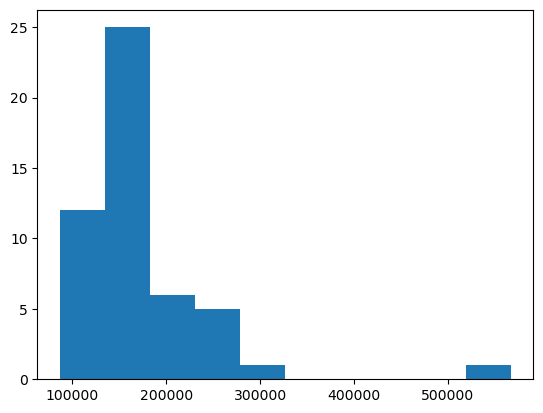

In [37]:
plt.hist(data['Sell']); 
#I created a histogram to look at the frequency of the selling prices and to see the shape of the data. 
#I wanted to look at the selling price variable because this is going to be our dependent variable in the regression.
#The data is skewed to the left, which is partly due to the outliers where Sell is greater than 500000. 

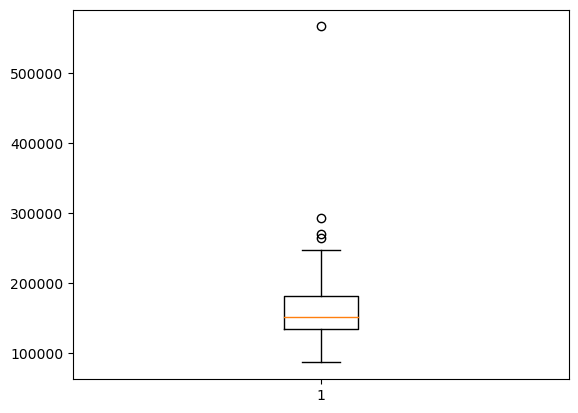

In [38]:
plt.boxplot(data['Sell']); 
#I created a boxplot to confirm that there were outliers. It looks as if there is one home thats selling price is greater
#than 500000. There are three other homes that are also outliers, however they are much closer to the tail than the other
#one is. The median selling price is where we would expect it to be based on the descriptive stats, around 150000. 

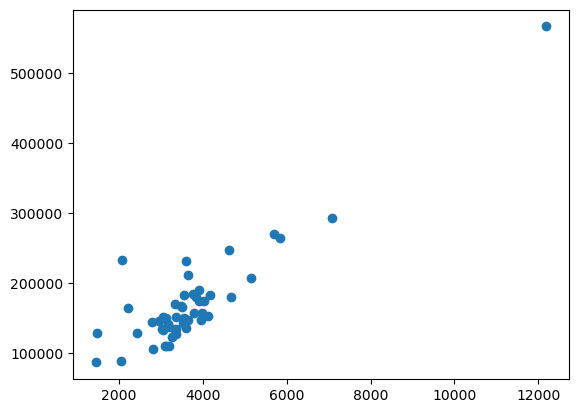

In [39]:
plt.scatter(data[' Taxes'], data['Sell']);
#Because we will be using Taxes as one of our independent variables, I wanted to see if there was a relationship between
#Taxes and the selling price. One of the assumptions of linear regression is that there is a linear relationship between
#the independent and dependent variable. If this assumption is violated, then the regression output may be misleading.
#There is a linear relationship between taxes and selling price, so we can proceed with the linear regression building.

In [40]:
#5. Using Taxes as the independent variable and Sell as the dependent variable, fit a linear regression model and display the output from the model
y = data['Sell']
x = data[' Taxes']
x = sm.add_constant(x)

In [41]:
model = sm.OLS(y,x).fit() #create regression

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           7.22e-19
Time:                        17:21:08   Log-Likelihood:                -588.82
No. Observations:                  50   AIC:                             1182.
Df Residuals:                      48   BIC:                             1185.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.687e+04   1.17e+04      1.443      0.155   -6634.576    4.04e+04
 Taxes        41.4150      2.906     14.250      0.000      35.571      47.259
==============================================================================
Omnibus:                       28.767   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.574
Skew:                           1.690   Prob(JB):                     1.16e-13
Kurtosis:                       7.144   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
#6. In addition to the model output include markdown commentary about the important statistics from the output; is taxes a good predictor for selling price? Why or why not?
#The R2 for this model was 80%. This means that 80% of the variance of the dependent variable can be explained by the independent
#variable (taxes). The p value for taxes was 0.00. The lower the p value, the more statistically significant this coefficient was.
#Because we are only using one variable in our prediction, we cannot say that taxes is the best or better predictor than 
#others may be. However, there is a strong correlation between taxes and sales price so it may be a good predictor. 

In [44]:
#7. Repeat this procedure using one of the other variables as the independent variable. Which model is "better"? What are some limitations of the model? 
y = data['Sell']
x = data[' Rooms']
x = sm.add_constant(x)

In [45]:
model = sm.OLS(y,x).fit() #create regression

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     21.98
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           2.31e-05
Time:                        17:21:21   Log-Likelihood:                -620.76
No. Observations:                  50   AIC:                             1246.
Df Residuals:                      48   BIC:                             1249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.553e+04   5.53e+04     -1.548      0.128   -1.97e+05    2.56e+04
 Rooms      3.175e+04   6772.111      4.688      0.000    1.81e+04    4.54e+04
==============================================================================
Omnibus:                       52.210   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              317.230
Skew:                           2.607   Prob(JB):                     1.30e-69
Kurtosis:                      14.184   Cond. No.                         53.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#The R2 for this model was only 30%. This model did not describe the variance of the sale price as well as the taxes model did. 
#The p value was also 0, just like with the previous model. The previous model can be considered to be better, but both 
#only have one variable. This causes omitted variable bias. There ared other variables involved that we are not including. 